# Byte Pair Encoding

Encoding- turning text into number

volcabulary size= no of tokens extracted from the dataset

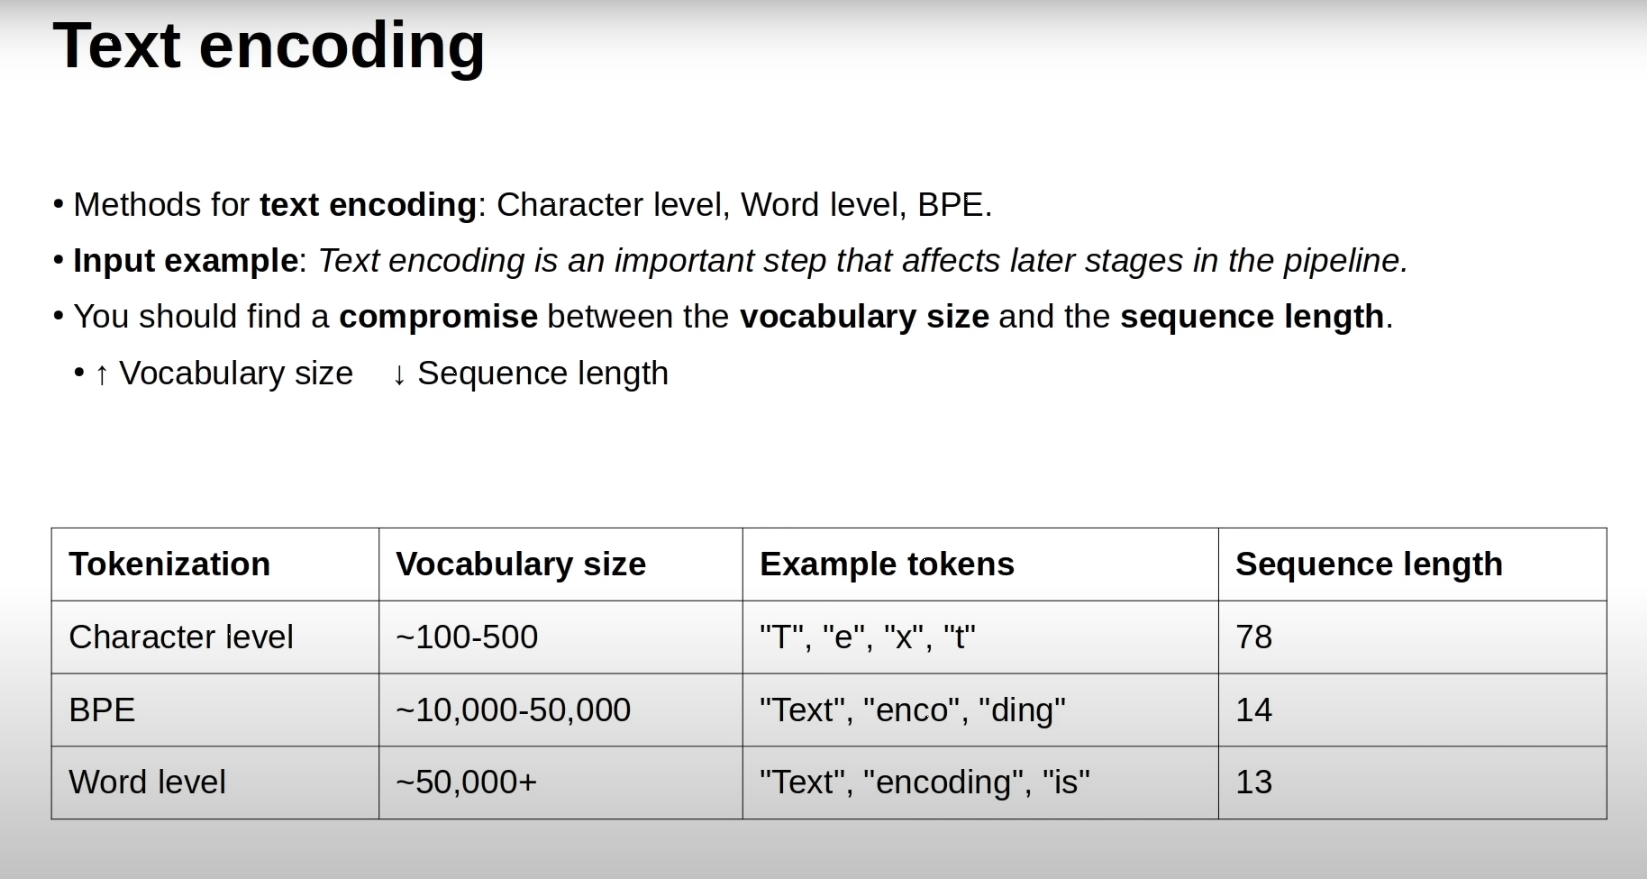

word level- computationally expensive- slow down bcs large matrix

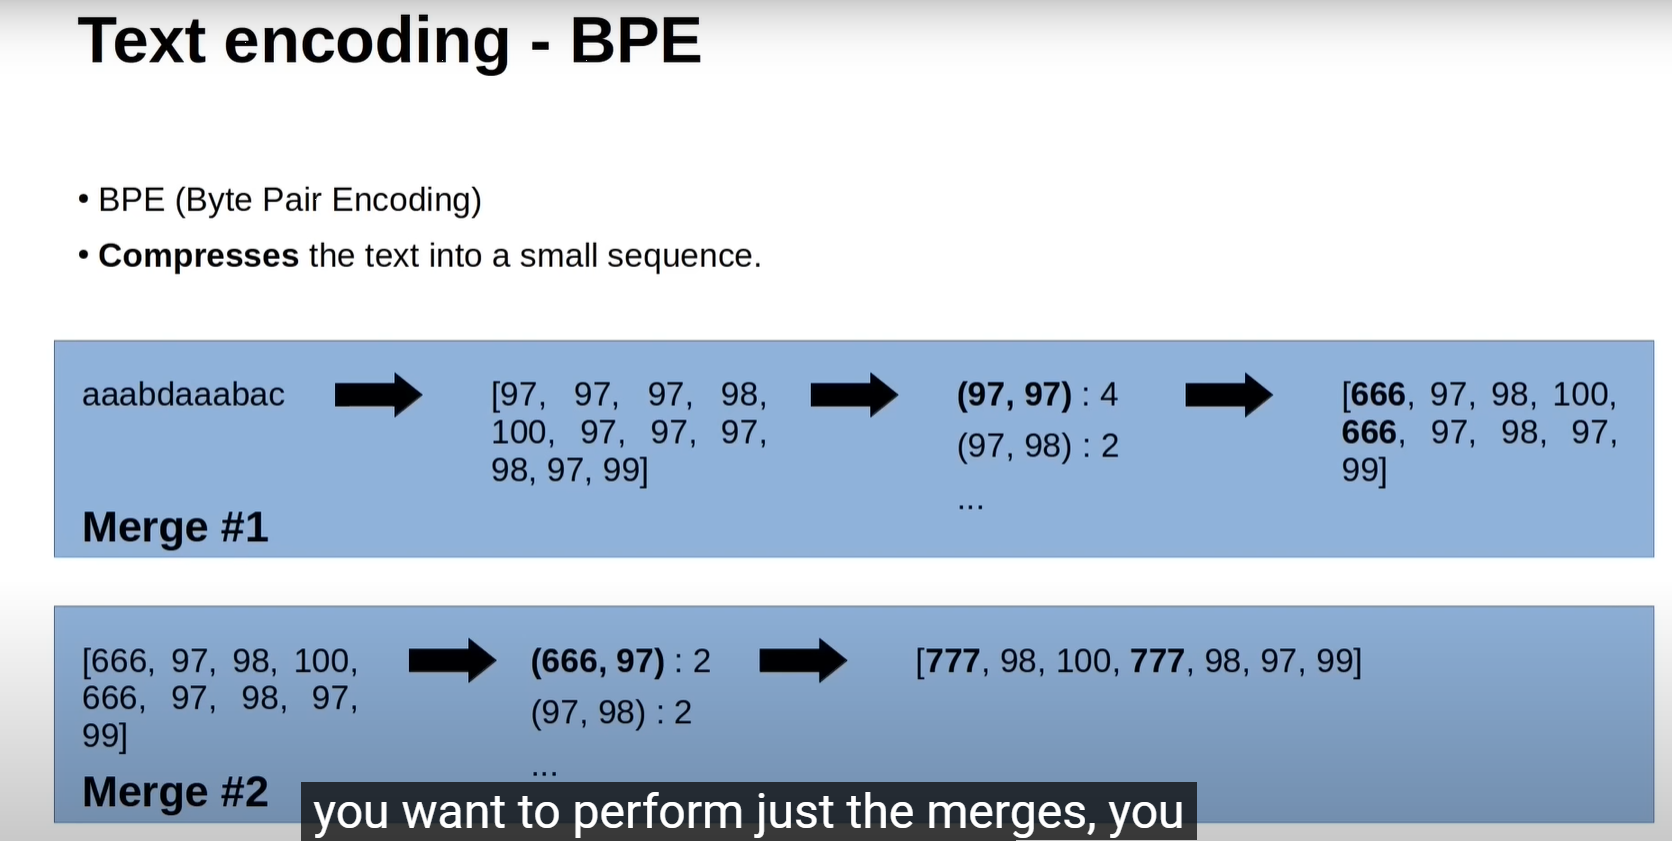

load the sequence

In [1]:
with open("../output/combined_text.txt","r",encoding="utf-8") as f:
    text_sequence=f.read()

len(text_sequence)

1865

# BPE Algorithm

using minBPE repository to tokenize the sequence of text

In [2]:
import sys 
sys.path.append("..")

The minBPE repo is outside your current script folder.

When you run your script, Python only looks for modules in certain places (current directory, installed packages, etc.).

Your repo folder might be a sibling folder or a parent folder, so Python doesn't see it by default.

Adding ".." (parent folder) or another relative path to sys.path manually tells Python, “Hey, also check this folder when importing.”

In [3]:
from minbpe import BasicTokenizer

tokenizer=BasicTokenizer()
tokenizer.train(text_sequence,vocab_size=1024) # vocab size depends on us

100%|██████████| 768/768 [00:00<00:00, 2229.51it/s]


In [4]:
#visualize vocab
vocab=tokenizer.vocab
vocab

{0: b'\x00',
 1: b'\x01',
 2: b'\x02',
 3: b'\x03',
 4: b'\x04',
 5: b'\x05',
 6: b'\x06',
 7: b'\x07',
 8: b'\x08',
 9: b'\t',
 10: b'\n',
 11: b'\x0b',
 12: b'\x0c',
 13: b'\r',
 14: b'\x0e',
 15: b'\x0f',
 16: b'\x10',
 17: b'\x11',
 18: b'\x12',
 19: b'\x13',
 20: b'\x14',
 21: b'\x15',
 22: b'\x16',
 23: b'\x17',
 24: b'\x18',
 25: b'\x19',
 26: b'\x1a',
 27: b'\x1b',
 28: b'\x1c',
 29: b'\x1d',
 30: b'\x1e',
 31: b'\x1f',
 32: b' ',
 33: b'!',
 34: b'"',
 35: b'#',
 36: b'$',
 37: b'%',
 38: b'&',
 39: b"'",
 40: b'(',
 41: b')',
 42: b'*',
 43: b'+',
 44: b',',
 45: b'-',
 46: b'.',
 47: b'/',
 48: b'0',
 49: b'1',
 50: b'2',
 51: b'3',
 52: b'4',
 53: b'5',
 54: b'6',
 55: b'7',
 56: b'8',
 57: b'9',
 58: b':',
 59: b';',
 60: b'<',
 61: b'=',
 62: b'>',
 63: b'?',
 64: b'@',
 65: b'A',
 66: b'B',
 67: b'C',
 68: b'D',
 69: b'E',
 70: b'F',
 71: b'G',
 72: b'H',
 73: b'I',
 74: b'J',
 75: b'K',
 76: b'L',
 77: b'M',
 78: b'N',
 79: b'O',
 80: b'P',
 81: b'Q',
 82: b'R',
 83: b'

In [5]:
#testing tokenizer

In [6]:
tokenizer.encode("How are you?")

[386, 349, 278, 63]

In [7]:
tokenizer.decode([386, 349, 278, 63])

'How are you?'

add special tokens to the vocabulary. these tokens are going to be used a lot in the fine-tuning step.

In [8]:
max_vocab_id=list(tokenizer.vocab.keys())[-1]
tokenizer.special_tokens={
    "<|startoftext|>": max_vocab_id + 1,
    "<|separator|>": max_vocab_id + 2,
    "<|endoftext|>": max_vocab_id + 3,
    "<|unk|>": max_vocab_id + 4,
    "<|padding|>": max_vocab_id + 5,

}

In [9]:
len(tokenizer.encode(text_sequence))

167

In [10]:
tokenizer.save(file_prefix="../output/tokenizer/my_tokenizer")